<a href="https://colab.research.google.com/github/chettkulkarni/MachineLearning/blob/master/Assignment_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wildfire Predictions

Dataset:- We have the historical dataset collected by american governement on all the wildfires in history of usa from 1900 to 2015.

Hypothesis:- Predicting Wildfire Damage Area based on several different features including
FIRE_YEAR, STAT_CAUSE_DESCR, LATITUDE, LONGITUDE, STATE, DISCOVERY_DATE

Task of this ntebook is to find if we can find effective clusters on the bases of datasets that we have.


In [0]:
#importing libraries required and also connecting to the sqlite3 db wildfire dataset.

import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D #
# conn = sqlite3.connect('../FPA_FOD_20170508.sqlite')

In [2]:
# conn
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#extracting meaningful columns
# df = pd.read_sql_query("SELECT FIRE_YEAR,SOURCE_REPORTING_UNIT,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,Shape,STAT_CAUSE_DESCR FROM 'Fires'", conn)
df=pd.read_csv('/content/drive/My Drive/Machine Learning/fire.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,Unnamed: 0,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,Shape,COUNTY,STAT_CAUSE_DESCR.1
0,0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,63,Miscellaneous
1,1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,61,Lightning
2,2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,17,Debris Burning
3,3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,3,Lightning
4,4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,3,Lightning
...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880460,2015,Missing/Undefined,40.481637,-122.389375,CA,2457291.5,0.01,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...,NaN,Missing/Undefined
1880461,1880461,2015,Miscellaneous,37.617619,-120.938570,CA,2457300.5,0.20,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...,NaN,Miscellaneous
1880462,1880462,2015,Missing/Undefined,37.617619,-120.938570,CA,2457144.5,0.10,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...,NaN,Missing/Undefined
1880463,1880463,2015,Missing/Undefined,37.672235,-120.898356,CA,2457309.5,2.00,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...,NaN,Missing/Undefined


In [5]:
df.columns

Index(['Unnamed: 0', 'FIRE_YEAR', 'STAT_CAUSE_DESCR', 'LATITUDE', 'LONGITUDE',
       'STATE', 'DISCOVERY_DATE', 'FIRE_SIZE', 'Shape', 'COUNTY',
       'STAT_CAUSE_DESCR.1'],
      dtype='object')

In [0]:
#finding pearson corelation in the dataset
pearsoncorr=df.corr()

The data in the dataset is hily un-corelated.

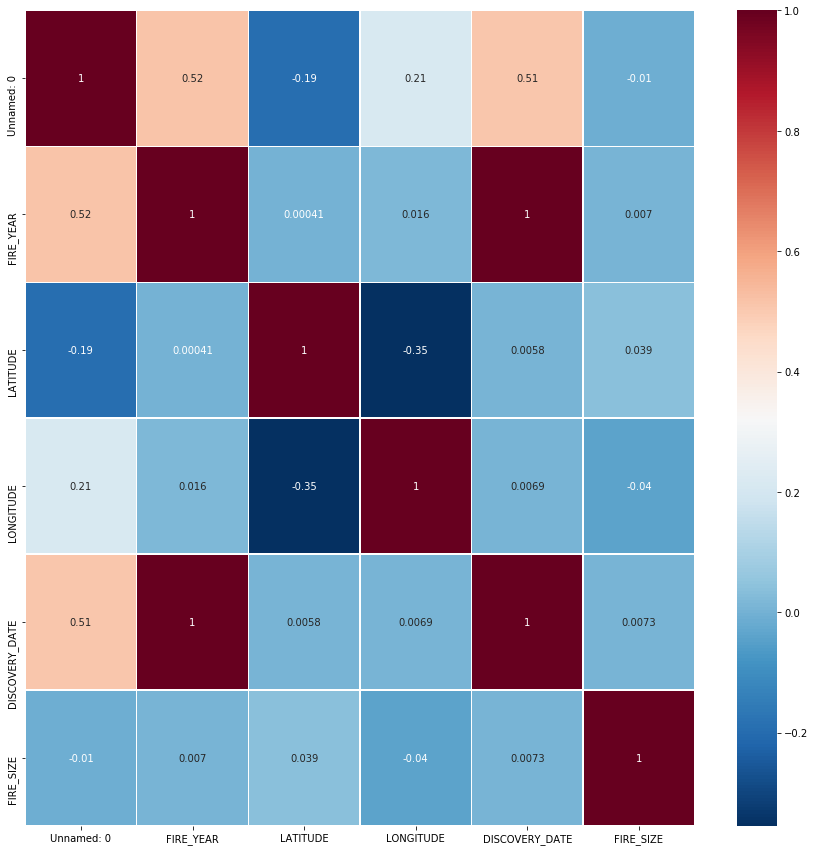

In [7]:

import seaborn as sb

plt.figure(1,figsize=(15,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,

            linewidth=0.5)

In [0]:
le = preprocessing.LabelEncoder()
le.fit(df.STATE)
df.STATE=le.transform(df.STATE)
le.fit(df.STAT_CAUSE_DESCR)
df.STAT_CAUSE_DESCR=le.transform(df.STAT_CAUSE_DESCR)
new_df=df.groupby(by=['STATE','FIRE_YEAR'],axis=0)['FIRE_SIZE'].mean().reset_index()


In [18]:
new_df

,STATE,FIRE_YEAR,FIRE_SIZE
0,0,1992,296.709771
1,0,1993,798.131823
2,0,1994,409.320156
3,0,1995,105.172488
4,0,1996,833.979387
...,...,...,...
1209,51,2011,210.672781
1210,51,2012,461.095086
1211,51,2013,93.497074
1212,51,2014,12.984689


In [0]:
df2=new_df
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(df2)
labels = gmm.predict(df2)


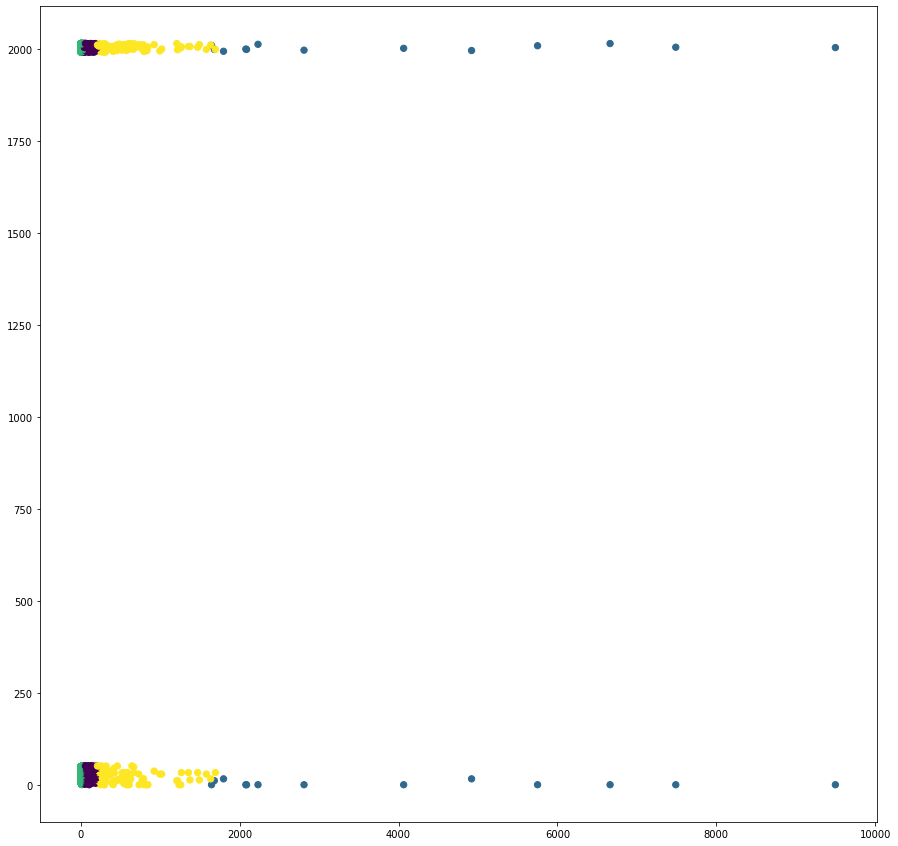

In [23]:
plt.figure(1,figsize=(15,15))
plt.scatter(df2.FIRE_SIZE, df2.STATE, c=labels, s=40, cmap='viridis');
plt.scatter(df2.FIRE_SIZE, df2.FIRE_YEAR, c=labels, s=40, cmap='viridis');